<a href="https://colab.research.google.com/github/RinuBinu/DATA-SCIENCE/blob/main/prgm18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

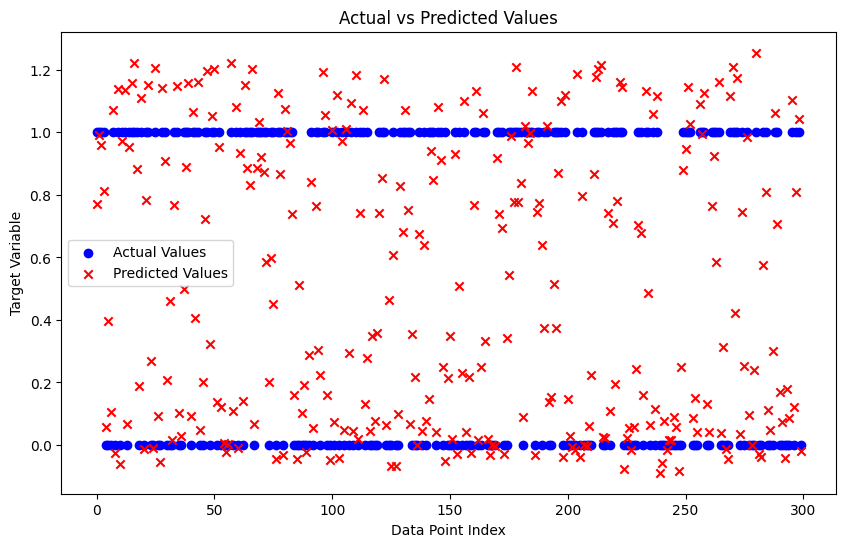

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

advertising = pd.read_csv('/content/Advertising.csv')
print(advertising.head())
print(advertising.describe())
print(advertising.info())

# Select only the numeric columns for features
numeric_cols = advertising.select_dtypes(include=np.number).columns.tolist()
# Remove the target variable from the feature list
numeric_cols.remove('Clicked on Ad')

print("Feature values:")
x = advertising[numeric_cols]
print(x)

print("Target variable values:")
y = advertising['Clicked on Ad']
print(y)


x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

y_pred = regressor.predict(x_test)
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
  print("Actual value:", actual, "Predicted value:", predicted)

# Note: Linear Regression is not the most appropriate model for a binary target variable ('Clicked on Ad').
# A classification model like Logistic Regression would be more suitable for this type of problem.
mislabeled_points = np.sum(np.round(y_test) != np.round(y_pred))
print ("Number of mislabeled points from test data set:", mislabeled_points)


mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()